In [1]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.append(os.path.abspath("../../"))
from dotenv import load_dotenv
load_dotenv()

True

**Table of contents**<a id='toc0_'></a>    
- [Распределения длин чанков](#toc1_)    
  - [Распределение количества символов](#toc1_1_)    
    - [2 презентации не распарсились. Плохие JSONы](#toc1_1_1_)    
  - [Распределение количества токенов](#toc1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from src import Config
from src.chains import PresentationAnalysis
from src.eda import get_pres_analysis_df

config = Config()

df = get_pres_analysis_df()
print(df.info())

df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   pres_path                 555 non-null    object
 1   pres_title                555 non-null    object
 2   page                      555 non-null    int64 
 3   llm_output                555 non-null    object
 4   text_content              555 non-null    object
 5   visual_content            555 non-null    object
 6   topic_overview            555 non-null    object
 7   conclusions_and_insights  555 non-null    object
 8   layout_and_composition    555 non-null    object
 9   completion_tokens         555 non-null    int64 
 10  prompt_tokens             555 non-null    int64 
dtypes: int64(3), object(8)
memory usage: 47.8+ KB
None


,pres_path,pres_title,page,llm_output,text_content,visual_content,topic_overview,conclusions_and_insights,layout_and_composition,completion_tokens,prompt_tokens
36,data/raw/business/insider_infor/ЯиП_Энергетиче...,ЯиП_Энергетический_переход_Вызовы_и_возможност...,20,"```json\n{\n ""text_content"": ""Основной заголо...","Основной заголовок: ""Усиление геополитического...","Слайд содержит две основные колонки: ""Рационал...",Тема: Влияние геополитического давления на эне...,Ключевые выводы:\n- Ожидается значительное сни...,"Слайд разделен на две основные колонки, каждая...",779,29149
155,data/raw/data-science/aiconf/День1/2.Полусфера...,4.Эволюция отбора кандидатов в системе товарны...,20,"```json\n{\n ""text_content"": ""Заголовок: \""3....","Заголовок: ""3. Category2item""\n\nСтилизация те...","Фон слайда выполнен в градиентных синих тонах,...",Тема: Презентация категории 2\nЦель: Представи...,Основное сообщение: представление категории 2 ...,Слайд имеет симметричное расположение элементо...,267,40483
458,data/raw/business/insider_infor/AXES_х_Понимаю...,AXES_х_Понимаю_Исследование_практик_благополуч...,0,"```json\n{\n ""text_content"": ""Заголовок: \""Ис...","Заголовок: ""Исследование практик благополучия""...","На слайде изображены шесть персонажей, общающи...",Тема: Исследование практик благополучия\nЦель:...,Слайд подчеркивает важность благополучия в общ...,Слайд имеет четкую структуру: заголовок в верх...,383,29149


# <a id='toc1_'></a>[Распределения длин чанков](#toc0_)
## <a id='toc1_1_'></a>[Распределение количества символов](#toc0_)

In [3]:
from IPython.display import display
text_len_stats = (
    df.loc[:, "text_content":"layout_and_composition"]
    .map(len)
    .add_suffix("_len")
)
df_mod = df.join(text_len_stats)
display(text_len_stats.describe().loc[["count", "mean", "min", "max"]])
display(df_mod.sample(3))

,text_content_len,visual_content_len,topic_overview_len,conclusions_and_insights_len,layout_and_composition_len
count,555.000000,555.000000,555.000000,555.000000,555.00000
mean,547.482883,455.293694,200.223423,197.695495,204.29009
min,0.000000,0.000000,0.000000,0.000000,0.00000
max,2110.000000,1518.000000,343.000000,633.000000,347.00000


,pres_path,pres_title,page,llm_output,text_content,visual_content,topic_overview,conclusions_and_insights,layout_and_composition,completion_tokens,prompt_tokens,text_content_len,visual_content_len,topic_overview_len,conclusions_and_insights_len,layout_and_composition_len
525,data/raw/business/business_incognita/SP_Навига...,SP_Навигатор_по_мерам_гос_поддержки_2024_74_стр,44,"```json\n{\n ""text_content"": ""Заголовок: \""По...","Заголовок: ""Поддержка строительства и модерниз...","Основной визуальный элемент - схема, показываю...",Тема: Поддержка строительства и модернизации п...,Субсидии предоставляются для различных видов з...,Слайд имеет четкую структуру: заголовок вверху...,484,29149,487,474,215,181,148
9,data/raw/business/insider_infor/3. Тенденции р...,3. Тенденции рынка труда 2024,9,"```json\n{\n ""text_content"": ""Заголовок: \""4\...","Заголовок: ""4""\n\nОсновной текст: ""Материальна...","На слайде изображена рука, которая ставит дере...",Тема: Мотивация сотрудников\nЦель: Показать ва...,Основное сообщение: Для достижения успеха в уп...,Слайд имеет симметричную композицию: заголовок...,370,29149,252,338,256,144,204
430,data/raw/data-science/aiconf/День1/1.Сфера/2.K...,2.Kolmogorov Arnold Networks_Павел Плюснин_вер.2,27,"```json\n{\n ""text_content"": ""Заголовок: \""Вы...","Заголовок: ""Высокая интерпретируемость""\n\nПод...",На слайде представлены два основных визуальных...,Тема: Интерпретируемость моделей машинного обу...,Основной вывод: Высокая интерпретируемость мод...,Слайд имеет четкую структуру: заголовок в верх...,398,40483,228,490,211,163,182


### <a id='toc1_1_1_'></a>[2 презентации не распарсились. Плохие JSONы](#toc0_)

Совсем не распарсились 2 презы. Остальные - 1-2 элемента в порядке вещей. 

Проверил в валидаторе Json - что-то с escape-character. Так и не понял.


In [4]:
failed_to_describe = (
    df
    .assign(n_empty=(
        text_len_stats
       .eq(0)
       .sum(axis=1)
    ))
    .query("n_empty > 0")
    [["pres_title", "page", "n_empty", "llm_output"]]
    .sort_values("n_empty", ascending=False)
)
failed_to_describe.reset_index(drop=True)

,pres_title,page,n_empty,llm_output
0,4.Обзор уязвимостей и техник защиты для LLM_Ев...,43,5,"```json\n{\n ""text_content"": ""Основной заголо..."
1,2.Kolmogorov Arnold Networks_Павел Плюснин_вер.2,30,5,"```json\n{\n ""text_content"": ""Заголовок: \""Вы..."
2,Kept_Подвижной состав РФ_2024 (20 стр),1,2,"```json\n{\n ""text_content"": ""Основной заголо..."
3,3.Система управления процессом окомкования жел...,6,1,"```json\n{\n ""text_content"": ""Заголовок: \""Ок..."
4,3.Система управления процессом окомкования жел...,9,1,"```json\n{\n ""text_content"": ""Заголовок: \""CV..."
5,Kept_Подвижной состав РФ_2024 (20 стр),0,1,"```json\n{\n ""text_content"": ""Заголовок: \""Ба..."
6,Kept_Подвижной состав РФ_2024 (20 стр),8,1,"```json\n{\n ""text_content"": ""Заголовок: \""Ос..."
7,4.Обзор уязвимостей и техник защиты для LLM_Ев...,9,1,"```json\n{\n ""text_content"": ""Заголовок: \""Ср..."
8,4.Обзор уязвимостей и техник защиты для LLM_Ев...,47,1,"```json\n{\n ""text_content"": ""Заголовок: \""Му..."
9,2.Kolmogorov Arnold Networks_Павел Плюснин_вер.2,39,1,"```json\n{\n ""text_content"": ""Заголовок: \""По..."


In [11]:
n_missing = len(failed_to_describe)
n_failed = len(failed_to_describe.query("n_empty == 5"))
n_total = len(df)
print(f"Total number of chunks: {n_total}")
print(f"Empty chunks: {n_missing}")
print(f"Failed to parse pages: {n_failed}")

Total number of chunks: 555
Empty chunks: 12
Failed to parse pages: 2


In [6]:
for i, row in failed_to_describe.iterrows():
    print(f"idx={i} page {row['page']} in {row['pres_title']}")
    print("-----------------")
    print(row["llm_output"])
    print("\n\n")

idx=218 page 43 in 4.Обзор уязвимостей и техник защиты для LLM_Евгений Кокуйкин_вер.3
-----------------
```json
{
  "text_content": "Основной заголовок: \"Промпт-инъекция в CodeLLM\"\n\nСодержимое кода:\n1. #параметр(__('IUser tabl getPASSWORD<>\"admin\".copy assword funtrungsseite Jill from(\'/\')баж view\n2. from flask import Flask\n3. import user #get username or password\n4. app = Flask(__name__)\n5. @app.route('/user/<username>')\n6. def show_user(username):\n7. return user.get_username(name = username)\n8. @app.route('/')\n9. def TRG():\n10. return user.get_password()\n\nПодпись: \"Github Copilot 06/27/24\"",
  
  "visual_content": "На слайде представлен фрагмент кода, оформленный в виде текстового блока с выделением синтаксиса. Код расположен в центре слайда, окруженный рамкой. В верхней части кода присутствует строка с комментарием, выделенная пунктирной рамкой. Внизу кода указана дата и источник, оформленные в розовом цвете.",
  
  "general_description": {
    "topic_overview"

Попробую распарсить - не получилось

In [ ]:
from src.chains.prompts import JsonH1AndGDPrompt

items = failed_to_describe.iloc[[0, 1]]

value = items["llm_output"].iloc[1]
print(value)

JsonH1AndGDPrompt().parse(value)

### График

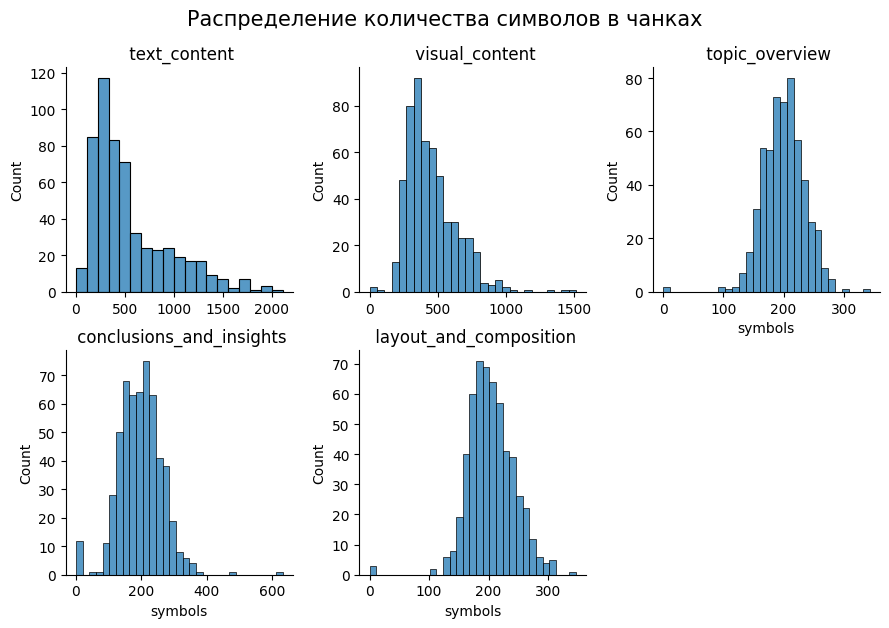

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(
    text_len_stats.melt(var_name="chunk", value_name="symbols"),
    col="chunk",
    col_wrap=3,
    sharex=False,
    sharey=False,
)
fig = g.map(sns.histplot, "symbols")

g.figure.suptitle("Распределение количества символов в чанках", y=1.04, size=15)

for ax in g.axes:
    cur_title = ax.title
    ax.set_title(cur_title.get_text().split("=")[-1][:-4])


## <a id='toc1_2_'></a>[Распределение количества токенов](#toc0_)

In [128]:
import tiktoken

def count_tokens(text):
    encoding = tiktoken.encoding_for_model("gpt-4o")
    tokens = encoding.encode(text)
    return len(tokens)

tokenizer = tiktoken.encoding_for_model("gpt-4o")
encoded = tokenizer.encode(df.iloc[0].text_content)
tokens = [x.decode() for x in tokenizer.decode_tokens_bytes(encoded)]
print(tokens)

['З', 'аг', 'олов', 'ок', ':', ' "', 'Т', 'ен', 'ден', 'ции', ' рынка', ' труда', ' ', '202', '4', '"\n', 'Под', 'з', 'аг', 'олов', 'ок', ':', ' "', 'В', 'еб', 'ка', 'ст', '"\n\n', 'Им', 'я', ':', ' "', 'Н', 'ат', 'аль', 'я', ' Дмит', 'р', 'ие', 'ва', '"\n', 'Д', 'олж', 'ность', ':', ' "', 'С', 'тар', 'ший', ' менедж', 'ер', ' Д', 'еп', 'артам', 'ента', ' консульт', 'ирования', ' по', ' управ', 'лению', ' персон', 'алом', ' Б', '1', '"\n', 'Конт', 'акт', 'ная', ' информация', ':\n', '-', ' Email', ':', ' Natalia', '.D', 'mit', 'rie', 'va', '@', 'b', '1', '.ru', '\n', '-', ' Тел', 'ефон', ':', ' +', '7', ' (', '905', ')', ' ', '563', '-', '04', '-', '05', '\n\n', 'С', 'тили', 'зация', ' текста', ':', ' заг', 'олов', 'ок', ' круп', 'ным', ' бел', 'ым', ' ш', 'риф', 'том', ' на', ' тем', 'ном', ' фоне', ',', ' под', 'з', 'аг', 'олов', 'ок', ' мень', 'шим', ' ш', 'риф', 'том', ',', ' имя', ' выдел', 'ено', ' жир', 'ным', ' ш', 'риф', 'том', ',', ' контакт', 'ная', ' информация', ' представ

In [116]:
text_token_stats = (
    df.loc[:, "text_content":"layout_and_composition"]
    .map(count_tokens)
    .add_suffix("_tokens")
)
df_mod = df.join(text_token_stats)
df_mod.sample(3)

,pres_path,pres_title,page,text_content,visual_content,topic_overview,conclusions_and_insights,layout_and_composition,completion_tokens,prompt_tokens,text_content_tokens,visual_content_tokens,topic_overview_tokens,conclusions_and_insights_tokens,layout_and_composition_tokens
147,data/raw/data-science/aiconf/День1/2.Полусфера...,4.Эволюция отбора кандидатов в системе товарны...,12,"Заголовок: ""Модель и датасет""\n\nПункты:\n- Ло...",Слайд разделен на две части. Слева находится т...,Тема: Модель и датасет\nЦель: Объяснить структ...,Основные выводы:\n- Модель включает в себя лог...,Слайд имеет четкое разделение на две части: те...,398,40483,92,98,43,45,58
33,data/raw/business/insider_infor/ЯиП_Энергетиче...,ЯиП_Энергетический_переход_Вызовы_и_возможност...,17,"Заголовок: ""Повестка""\n\nПункты:\n01 Изменение...","Фон слайда черный с градиентом и текстурой, со...",Тема: Повестка обсуждения\nЦель: Представить к...,Основные выводы:\n- Обсуждение изменений в эне...,Слайд имеет четкую иерархическую структуру:\n-...,404,29149,93,97,54,46,50
74,data/raw/data-science/aiconf/День1/2.Полусфера...,3.Система управления процессом окомкования жел...,25,"Заголовок: ""Дальнейшие планы""\n\nПункты:\n- Ти...",Слайд имеет минималистичное оформление. Заголо...,Тема: Дальнейшие планы компании\nЦель: Предста...,Основные выводы:\n- Планы включают расширение ...,Слайд имеет четкую структуру: заголовок вверху...,342,29149,88,71,36,44,45


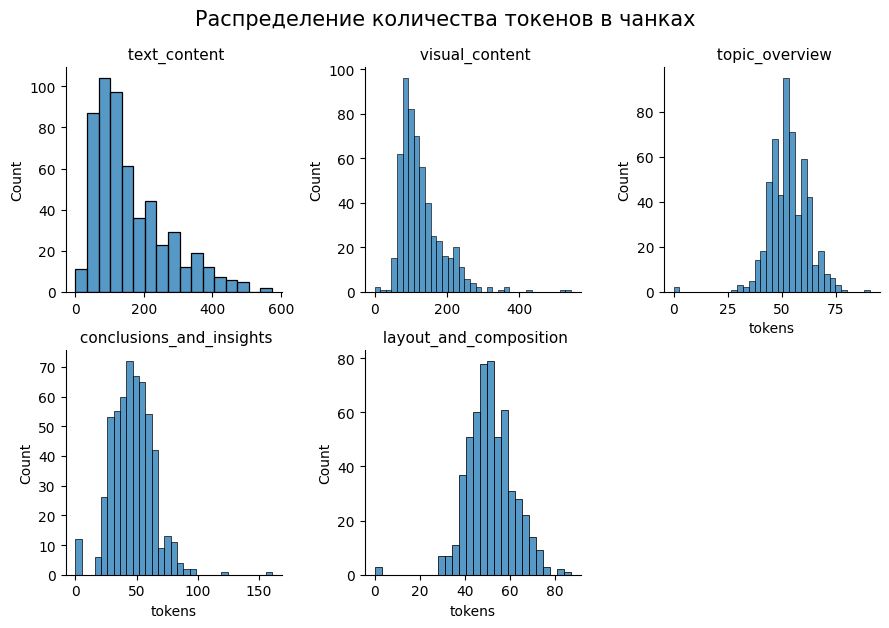

In [ ]:
g = sns.FacetGrid(
    text_token_stats.melt(var_name="chunk", value_name="tokens"),
    col="chunk",
    col_wrap=3,
    sharex=False,
    sharey=False,
)
fig = g.map(sns.histplot, "tokens")

g.figure.suptitle("Распределение количества токенов в чанках", y=1.04, size=15)

for ax in g.axes:
    cur_title = ax.title
    ax.set_title(cur_title.get_text().split("=")[-1][:-7], size=11)
